In [1]:
import collections

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import contextlib

%matplotlib inline

In [2]:
tf.__version__

'1.1.0'

# Load MNIST

In [3]:
mnist = input_data.read_data_sets('mnist', one_hot=True)
image_size = 28 * 28
num_classes = 10
assert mnist.train.images.shape[1] == image_size
assert mnist.train.labels.shape[1] == num_classes

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


# Linear Logistic Regression
References
- [MNIST For ML Beginners](https://www.tensorflow.org/versions/r0.9/tutorials/mnist/beginners/index.html)
- [L2 Reguralization example](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/models/image/mnist/convolutional.py)
  - How is `tf.nn.l2_loss` different from square and reduce_sum?

In [4]:
def RunLogsticRegression(learning_rate = 0.05,
                         batch_size = 8,
                         steps = 200 * 1000,
                         sample = 1000,
                         l2_regularization_strength = 0.0):
    train_losses = []
    validation_losses = []
    step_records = []

    @contextlib.contextmanager
    def show_graph():
        try:
            yield
        finally:
            plt.plot(step_records, train_losses)
            plt.plot(step_records, validation_losses)
            plt.show()

    graph = tf.Graph()
    sess = tf.Session(graph=graph)
    with graph.as_default():
        inputs = tf.placeholder(tf.float32, [None, image_size])
        labels = tf.placeholder(tf.float32, [None, num_classes])

        weights = tf.Variable(tf.truncated_normal([image_size, num_classes], stddev=1), name='a')
        biases = tf.Variable(tf.constant(0.1, shape=[num_classes]))
        logits = tf.matmul(inputs, weights) + biases
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
        
        loss = cross_entropy
        if l2_regularization_strength > 0:
            regularizer = tf.nn.l2_loss(weights) + tf.nn.l2_loss(biases)
            loss += l2_regularization_strength * regularizer

        train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

        correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

        init_variables = tf.global_variables_initializer()

    with show_graph(), sess.as_default():
        init_variables.run()
        for step in xrange(steps):
            batch_input, batch_label = mnist.train.next_batch(batch_size)
            sess.run(train_step, {inputs: batch_input, labels: batch_label})
            if step % sample == 0:
                batch_entropy, batch_accuracy = sess.run((cross_entropy, accuracy),
                                                         {inputs: batch_input, labels: batch_label})
                train_entropy, train_accuracy = sess.run((cross_entropy, accuracy),
                                                         {inputs: mnist.train.images, labels: mnist.train.labels})
                validation_entropy, validation_accuracy = sess.run((cross_entropy, accuracy),
                                                                   {inputs: mnist.validation.images, labels: mnist.validation.labels})
                print 'step: %d, batch loss: %f, train loss: %f, train accuracy: %.2f%%, validation loss: %f, validation accuracy: %.2f%%' % (
                    step, batch_entropy, train_entropy, 100. * train_accuracy, validation_entropy, 100. * validation_accuracy)
                if step > 10000:
                    step_records.append(step)
                    train_losses.append(train_entropy)
                    validation_losses.append(validation_entropy)

step: 0, batch loss: 11.254118, train loss: 13.565357, train accuracy: 13.01%, validation loss: 13.613159, validation accuracy: 13.44%
step: 1000, batch loss: 0.621442, train loss: 1.223060, train accuracy: 74.63%, validation loss: 1.185761, validation accuracy: 75.52%
step: 2000, batch loss: 1.580356, train loss: 0.874641, train accuracy: 80.84%, validation loss: 0.845006, validation accuracy: 81.90%
step: 3000, batch loss: 0.109550, train loss: 0.749208, train accuracy: 83.27%, validation loss: 0.725033, validation accuracy: 84.34%
step: 4000, batch loss: 0.018759, train loss: 0.669638, train accuracy: 84.61%, validation loss: 0.648239, validation accuracy: 85.62%
step: 5000, batch loss: 0.157296, train loss: 0.636471, train accuracy: 85.16%, validation loss: 0.627879, validation accuracy: 85.90%
step: 6000, batch loss: 0.222711, train loss: 0.576403, train accuracy: 86.45%, validation loss: 0.564561, validation accuracy: 87.14%
step: 7000, batch loss: 0.004111, train loss: 0.550616,

step: 61000, batch loss: 0.217509, train loss: 0.322566, train accuracy: 91.44%, validation loss: 0.327494, validation accuracy: 91.68%
step: 62000, batch loss: 0.105746, train loss: 0.314012, train accuracy: 91.46%, validation loss: 0.318922, validation accuracy: 91.32%
step: 63000, batch loss: 0.147563, train loss: 0.320096, train accuracy: 91.27%, validation loss: 0.328540, validation accuracy: 91.06%
step: 64000, batch loss: 0.026468, train loss: 0.317391, train accuracy: 91.25%, validation loss: 0.327503, validation accuracy: 91.08%
step: 65000, batch loss: 0.051114, train loss: 0.318475, train accuracy: 91.27%, validation loss: 0.328799, validation accuracy: 91.04%
step: 66000, batch loss: 0.248636, train loss: 0.307029, train accuracy: 91.68%, validation loss: 0.320655, validation accuracy: 91.42%
step: 67000, batch loss: 0.162854, train loss: 0.305333, train accuracy: 91.77%, validation loss: 0.317318, validation accuracy: 91.44%
step: 68000, batch loss: 0.090153, train loss: 0

step: 122000, batch loss: 0.138872, train loss: 0.275695, train accuracy: 92.46%, validation loss: 0.295081, validation accuracy: 92.32%
step: 123000, batch loss: 0.047253, train loss: 0.287210, train accuracy: 92.03%, validation loss: 0.307942, validation accuracy: 91.58%
step: 124000, batch loss: 0.080056, train loss: 0.272656, train accuracy: 92.55%, validation loss: 0.295963, validation accuracy: 92.06%
step: 125000, batch loss: 0.054403, train loss: 0.274940, train accuracy: 92.55%, validation loss: 0.296570, validation accuracy: 92.22%
step: 126000, batch loss: 0.263473, train loss: 0.279773, train accuracy: 92.32%, validation loss: 0.304697, validation accuracy: 91.66%
step: 127000, batch loss: 1.726015, train loss: 0.281657, train accuracy: 92.30%, validation loss: 0.301307, validation accuracy: 91.88%
step: 128000, batch loss: 0.461541, train loss: 0.279673, train accuracy: 92.22%, validation loss: 0.301757, validation accuracy: 91.88%
step: 129000, batch loss: 0.523133, train

step: 182000, batch loss: 0.021156, train loss: 0.264701, train accuracy: 92.63%, validation loss: 0.290278, validation accuracy: 91.92%
step: 183000, batch loss: 0.136540, train loss: 0.265004, train accuracy: 92.57%, validation loss: 0.293252, validation accuracy: 91.90%
step: 184000, batch loss: 0.066584, train loss: 0.258710, train accuracy: 92.92%, validation loss: 0.287344, validation accuracy: 92.16%
step: 185000, batch loss: 0.039148, train loss: 0.262344, train accuracy: 92.78%, validation loss: 0.290075, validation accuracy: 92.30%
step: 186000, batch loss: 0.119558, train loss: 0.259057, train accuracy: 92.92%, validation loss: 0.291717, validation accuracy: 91.94%
step: 187000, batch loss: 0.108678, train loss: 0.257457, train accuracy: 92.86%, validation loss: 0.287412, validation accuracy: 92.00%
step: 188000, batch loss: 0.181435, train loss: 0.256343, train accuracy: 92.92%, validation loss: 0.285909, validation accuracy: 92.04%
step: 189000, batch loss: 0.100014, train

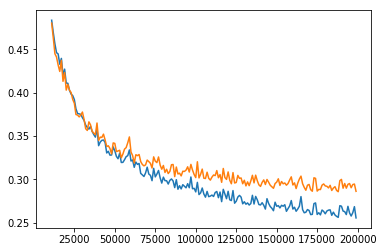

In [5]:
RunLogsticRegression()

step: 0, batch loss: 9.173740, train loss: 14.272741, train accuracy: 11.18%, validation loss: 14.067716, validation accuracy: 10.54%
step: 1000, batch loss: 3.364270, train loss: 1.952444, train accuracy: 60.69%, validation loss: 1.868599, validation accuracy: 61.32%
step: 2000, batch loss: 1.346344, train loss: 1.289300, train accuracy: 72.43%, validation loss: 1.207721, validation accuracy: 73.74%
step: 3000, batch loss: 0.458598, train loss: 1.045034, train accuracy: 76.94%, validation loss: 0.965616, validation accuracy: 78.64%
step: 4000, batch loss: 1.749797, train loss: 0.922399, train accuracy: 79.38%, validation loss: 0.859973, validation accuracy: 80.58%
step: 5000, batch loss: 1.592070, train loss: 0.838615, train accuracy: 81.20%, validation loss: 0.772437, validation accuracy: 82.74%
step: 6000, batch loss: 0.648750, train loss: 0.787010, train accuracy: 82.23%, validation loss: 0.730018, validation accuracy: 83.34%
step: 7000, batch loss: 0.355700, train loss: 0.738360, 

step: 61000, batch loss: 0.450734, train loss: 0.368737, train accuracy: 90.35%, validation loss: 0.372411, validation accuracy: 90.32%
step: 62000, batch loss: 0.606158, train loss: 0.369349, train accuracy: 90.27%, validation loss: 0.372124, validation accuracy: 90.36%
step: 63000, batch loss: 0.674607, train loss: 0.369890, train accuracy: 90.25%, validation loss: 0.374999, validation accuracy: 90.38%
step: 64000, batch loss: 0.024732, train loss: 0.367111, train accuracy: 90.38%, validation loss: 0.373454, validation accuracy: 90.44%
step: 65000, batch loss: 0.149730, train loss: 0.366522, train accuracy: 90.50%, validation loss: 0.370854, validation accuracy: 90.40%
step: 66000, batch loss: 0.458344, train loss: 0.364090, train accuracy: 90.41%, validation loss: 0.368700, validation accuracy: 90.54%
step: 67000, batch loss: 2.155894, train loss: 0.362634, train accuracy: 90.39%, validation loss: 0.368707, validation accuracy: 90.20%
step: 68000, batch loss: 0.225126, train loss: 0

step: 122000, batch loss: 0.067478, train loss: 0.316161, train accuracy: 91.51%, validation loss: 0.330340, validation accuracy: 91.50%
step: 123000, batch loss: 0.128557, train loss: 0.315661, train accuracy: 91.57%, validation loss: 0.330494, validation accuracy: 91.40%
step: 124000, batch loss: 0.861188, train loss: 0.313723, train accuracy: 91.46%, validation loss: 0.330772, validation accuracy: 91.36%
step: 125000, batch loss: 0.005349, train loss: 0.316048, train accuracy: 91.48%, validation loss: 0.330437, validation accuracy: 91.50%
step: 126000, batch loss: 0.135362, train loss: 0.312361, train accuracy: 91.59%, validation loss: 0.326127, validation accuracy: 91.62%
step: 127000, batch loss: 2.064535, train loss: 0.312491, train accuracy: 91.51%, validation loss: 0.330128, validation accuracy: 91.66%
step: 128000, batch loss: 0.208197, train loss: 0.312570, train accuracy: 91.58%, validation loss: 0.326194, validation accuracy: 91.56%
step: 129000, batch loss: 0.216945, train

step: 182000, batch loss: 0.398313, train loss: 0.294409, train accuracy: 92.02%, validation loss: 0.314818, validation accuracy: 91.68%
step: 183000, batch loss: 0.320341, train loss: 0.291647, train accuracy: 92.01%, validation loss: 0.310480, validation accuracy: 91.72%
step: 184000, batch loss: 0.176722, train loss: 0.298942, train accuracy: 91.77%, validation loss: 0.317031, validation accuracy: 91.52%
step: 185000, batch loss: 0.480806, train loss: 0.289312, train accuracy: 92.08%, validation loss: 0.310238, validation accuracy: 91.90%
step: 186000, batch loss: 0.049966, train loss: 0.291392, train accuracy: 91.95%, validation loss: 0.313780, validation accuracy: 91.90%
step: 187000, batch loss: 0.146054, train loss: 0.289880, train accuracy: 92.08%, validation loss: 0.311852, validation accuracy: 91.70%
step: 188000, batch loss: 0.075179, train loss: 0.294114, train accuracy: 91.88%, validation loss: 0.316922, validation accuracy: 91.66%
step: 189000, batch loss: 0.856467, train

step: 242000, batch loss: 0.109894, train loss: 0.278450, train accuracy: 92.31%, validation loss: 0.305376, validation accuracy: 91.80%
step: 243000, batch loss: 0.078152, train loss: 0.276202, train accuracy: 92.50%, validation loss: 0.303158, validation accuracy: 91.80%
step: 244000, batch loss: 0.320425, train loss: 0.275559, train accuracy: 92.51%, validation loss: 0.301244, validation accuracy: 91.82%
step: 245000, batch loss: 0.030176, train loss: 0.276415, train accuracy: 92.47%, validation loss: 0.301957, validation accuracy: 92.02%
step: 246000, batch loss: 0.095441, train loss: 0.274594, train accuracy: 92.55%, validation loss: 0.300683, validation accuracy: 91.90%
step: 247000, batch loss: 0.088449, train loss: 0.276909, train accuracy: 92.38%, validation loss: 0.299924, validation accuracy: 92.06%
step: 248000, batch loss: 0.014002, train loss: 0.274331, train accuracy: 92.49%, validation loss: 0.301190, validation accuracy: 91.98%
step: 249000, batch loss: 0.582693, train

step: 302000, batch loss: 0.302227, train loss: 0.265834, train accuracy: 92.71%, validation loss: 0.296097, validation accuracy: 91.94%
step: 303000, batch loss: 0.068760, train loss: 0.267009, train accuracy: 92.71%, validation loss: 0.298202, validation accuracy: 92.30%
step: 304000, batch loss: 0.063799, train loss: 0.265710, train accuracy: 92.83%, validation loss: 0.298079, validation accuracy: 92.20%
step: 305000, batch loss: 0.071579, train loss: 0.267347, train accuracy: 92.57%, validation loss: 0.298885, validation accuracy: 92.04%
step: 306000, batch loss: 0.297785, train loss: 0.267209, train accuracy: 92.67%, validation loss: 0.298111, validation accuracy: 91.92%
step: 307000, batch loss: 0.029402, train loss: 0.266248, train accuracy: 92.73%, validation loss: 0.296843, validation accuracy: 91.84%
step: 308000, batch loss: 0.139817, train loss: 0.270148, train accuracy: 92.60%, validation loss: 0.299635, validation accuracy: 92.10%
step: 309000, batch loss: 0.622306, train

step: 362000, batch loss: 0.256218, train loss: 0.260435, train accuracy: 92.86%, validation loss: 0.293719, validation accuracy: 92.14%
step: 363000, batch loss: 0.119500, train loss: 0.260085, train accuracy: 92.87%, validation loss: 0.291404, validation accuracy: 92.00%
step: 364000, batch loss: 0.076321, train loss: 0.259652, train accuracy: 92.86%, validation loss: 0.292448, validation accuracy: 92.12%
step: 365000, batch loss: 0.082586, train loss: 0.258921, train accuracy: 92.82%, validation loss: 0.291222, validation accuracy: 92.06%
step: 366000, batch loss: 0.186302, train loss: 0.260408, train accuracy: 92.81%, validation loss: 0.292430, validation accuracy: 92.06%
step: 367000, batch loss: 0.261681, train loss: 0.260250, train accuracy: 92.88%, validation loss: 0.295770, validation accuracy: 92.24%
step: 368000, batch loss: 0.010776, train loss: 0.259487, train accuracy: 92.89%, validation loss: 0.293593, validation accuracy: 92.18%
step: 369000, batch loss: 0.024068, train

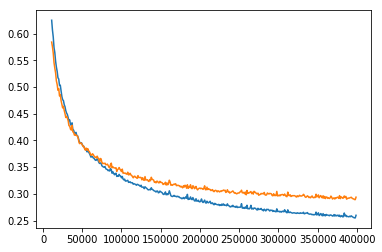

In [6]:
RunLogsticRegression(
    learning_rate=0.02,
    steps = 400 * 1000,
    l2_regularization_strength=0.1,
)

# Neural Network with LeRU and softmax

In [7]:
def RunNeuralNetwork(learning_rate = 0.01,
                     batch_size = 16,
                     steps = 100 * 1000,
                     sample = 5000,
                     dropout_keep_prob = 1.0,
                     hidden_sizes = [100, 75, 50]):
    graph = tf.Graph()
    sess = tf.Session(graph=graph)

    with graph.as_default():
        inputs = tf.placeholder(tf.float32, [None, image_size])
        labels = tf.placeholder(tf.float32, [None, num_classes])
        keep_prob = tf.placeholder(tf.float32)

        layer = inputs
        for hidden_size in hidden_sizes:
            input_size = layer.get_shape()[1].value
            weights = tf.Variable(tf.truncated_normal([input_size, hidden_size], stddev=0.1))
            biases = tf.Variable(tf.constant(0.1, shape=[hidden_size]))
            layer = tf.nn.relu(tf.matmul(layer, weights) + biases)
            if dropout_keep_prob < 1.0:
                layer = tf.nn.dropout(layer, keep_prob)

        input_size = layer.get_shape()[1].value
        weights = tf.Variable(tf.truncated_normal([input_size, num_classes], stddev=0.1))
        biases = tf.Variable(tf.constant(0.1, shape=[num_classes]))
        logits = tf.matmul(layer, weights) + biases
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))

        # train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)    
        train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
        
        correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

        # This must be called after all Variable definitions.
        init_variables = tf.global_variables_initializer()

    step_records = []
    train_losses = []
    validation_losses = []
    @contextlib.contextmanager
    def show_graph():
        try:
            yield
        finally:
            plt.plot(step_records, train_losses)
            plt.plot(step_records, validation_losses)
            plt.show()

    with show_graph(), sess.as_default():
        init_variables.run()

        for step in xrange(steps):
            batch_input, batch_label = mnist.train.next_batch(batch_size)
            sess.run(train_step, {inputs: batch_input, labels: batch_label, keep_prob: dropout_keep_prob})
            if step % sample == 0 or step == steps - 1:
                batch_entropy = sess.run(
                    cross_entropy,
                    {inputs: mnist.validation.images, labels: mnist.validation.labels, keep_prob: 1.0}
                )
                train_entropy, train_accuracy = sess.run(
                    (cross_entropy, accuracy),
                    {inputs: mnist.train.images, labels: mnist.train.labels, keep_prob: 1.0}
                )
                validation_entropy, validation_accuracy = sess.run(
                    (cross_entropy, accuracy),
                    {inputs: mnist.validation.images, labels: mnist.validation.labels, keep_prob: 1.0}
                )
                print 'step: %d, batch loss: %.4f, train loss: %f, train accuracy: %.2f%%, validation loss: %.4f, validation accuracy: %.2f%%' % (
                    step, batch_entropy, train_entropy, 100. * train_accuracy, validation_entropy, 100. * validation_accuracy)
                if train_entropy < 0.5:
                    step_records.append(step)
                    train_losses.append(train_entropy)
                    validation_losses.append(validation_entropy)

step: 0, batch loss: 2.3103, train loss: 2.306453, train accuracy: 10.57%, validation loss: 2.3103, validation accuracy: 10.44%
step: 5000, batch loss: 0.2332, train loss: 0.248508, train accuracy: 92.85%, validation loss: 0.2332, validation accuracy: 93.50%
step: 10000, batch loss: 0.1719, train loss: 0.180477, train accuracy: 94.84%, validation loss: 0.1719, validation accuracy: 94.92%
step: 15000, batch loss: 0.1422, train loss: 0.145580, train accuracy: 95.62%, validation loss: 0.1422, validation accuracy: 95.98%
step: 20000, batch loss: 0.1234, train loss: 0.119749, train accuracy: 96.45%, validation loss: 0.1234, validation accuracy: 96.64%
step: 25000, batch loss: 0.1110, train loss: 0.099360, train accuracy: 96.99%, validation loss: 0.1110, validation accuracy: 96.98%
step: 30000, batch loss: 0.1024, train loss: 0.085546, train accuracy: 97.50%, validation loss: 0.1024, validation accuracy: 97.14%
step: 35000, batch loss: 0.0971, train loss: 0.073554, train accuracy: 97.81%, va

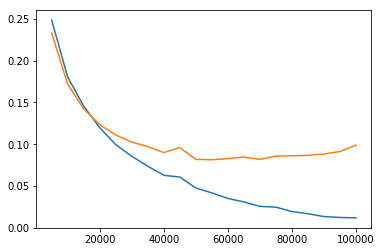

In [8]:
RunNeuralNetwork()

step: 0, batch loss: 2.3636, train loss: 2.367889, train accuracy: 14.22%, validation loss: 2.3636, validation accuracy: 14.40%
step: 5000, batch loss: 0.3597, train loss: 0.366947, train accuracy: 89.84%, validation loss: 0.3597, validation accuracy: 90.20%
step: 10000, batch loss: 0.2390, train loss: 0.242679, train accuracy: 92.96%, validation loss: 0.2390, validation accuracy: 93.26%
step: 15000, batch loss: 0.1822, train loss: 0.185622, train accuracy: 94.60%, validation loss: 0.1822, validation accuracy: 94.96%
step: 20000, batch loss: 0.1512, train loss: 0.153032, train accuracy: 95.48%, validation loss: 0.1512, validation accuracy: 95.90%
step: 25000, batch loss: 0.1359, train loss: 0.131686, train accuracy: 96.14%, validation loss: 0.1359, validation accuracy: 96.26%
step: 30000, batch loss: 0.1252, train loss: 0.114522, train accuracy: 96.67%, validation loss: 0.1252, validation accuracy: 96.72%
step: 35000, batch loss: 0.1162, train loss: 0.100767, train accuracy: 97.06%, va

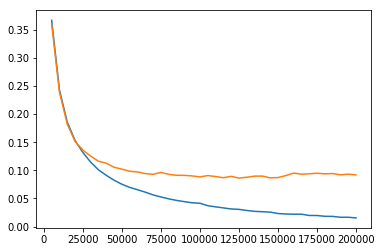

In [9]:
RunNeuralNetwork(
    dropout_keep_prob=0.5,
    steps = 200 * 1000,
    hidden_sizes = [200, 150, 100],
)

# Convolutional Network
- [Deep MNIST for Experts](https://www.tensorflow.org/versions/r0.9/tutorials/mnist/pros/index.html)
- [An example in tensorflow: convolutional.py](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/models/image/mnist/convolutional.py)

In [10]:
ConvConfig = collections.namedtuple('ConvConfig', ['patch', 'channel'])

default_conv_configs = [
    ConvConfig(patch=5, channel=32),
    ConvConfig(patch=5, channel=64),
]

image_width = 28
assert image_width * image_width == image_size

def RunConvolutionalNN(
    batch_size = 64,
    learning_rate = 0.01,
    steps = 10000,
    sample = 100,
    conv_configs=default_conv_configs,
    fully_connect_sizes = [512],
    dropout_keep_prob = 1.0,
):
    graph = tf.Graph()
    sess = tf.Session(graph=graph)

    with graph.as_default():
        images = tf.placeholder(tf.float32, [None, image_size])
        labels = tf.placeholder(tf.float32, [None, num_classes])
        keep_prob = tf.placeholder(tf.float32)

        layer = tf.reshape(images, [-1, image_width, image_width, 1], name='reshaped')
        print 'reshaped input shape:', layer.get_shape()
        for i in xrange(len(conv_configs)):
            config = conv_configs[i]
            weight_shape = [config.patch, config.patch, layer.get_shape()[-1].value, config.channel]
            weight = tf.Variable(tf.truncated_normal(weight_shape, stddev=0.1))
            conv = tf.nn.conv2d(layer, weight, strides=[1, 1, 1, 1], padding='SAME')
            bias = tf.Variable(tf.zeros([config.channel]))
            conv = tf.nn.relu(tf.nn.bias_add(conv, bias))

            # Is the order of relu and max_pool important?
            layer = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            print 'conv layer.shape (%d):' % i, layer.get_shape()

        layer = tf.reshape(layer, [-1, 7 * 7 * 64])
        for i in xrange(len(fully_connect_sizes)):
          size = fully_connect_sizes[i]
          weight = tf.Variable(tf.truncated_normal([layer.get_shape()[1].value, size], stddev=0.1))
          bias = tf.Variable(tf.constant(0.1, shape=[size]))
          layer = tf.nn.relu(tf.matmul(layer, weight) + bias)
          if dropout_keep_prob < 1.0:
            layer = tf.nn.dropout(layer, keep_prob)
          print 'fully-connected.shape (%d):' % i, layer.get_shape()

        weight = tf.Variable(tf.truncated_normal([layer.get_shape()[1].value, num_classes], stddev=0.1))
        bias = tf.Variable(tf.constant(0.1, shape=[num_classes]))
        logits = tf.matmul(layer, weight) + bias

        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))

        # train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)    
        train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
        
        correct_count = tf.reduce_sum(tf.cast(tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1)), tf.int32))

        init_variables = tf.global_variables_initializer()
        
    step_records = []
    validation_losses = []
    @contextlib.contextmanager
    def show_graph():
        try:
            yield
        finally:
            plt.plot(step_records, validation_losses)
            plt.show()

    # This is important to save RAM.
    def evaluate_in_batches(dataset):
        EVAL_BATCH_SIZE = 128
        size = dataset.images.shape[0]
        losses = []
        correct_sum = 0
        for start in xrange(0, size, EVAL_BATCH_SIZE):
            end = start + EVAL_BATCH_SIZE
            if end > size:
                end = size
            loss, correct = sess.run([cross_entropy, correct_count], {images: dataset.images[start:end], labels:dataset.labels[start:end], keep_prob: 1.0})
            losses.append(loss)
            correct_sum += correct
        return np.mean(losses), 1.0 * correct_sum / size

    with show_graph(), sess.as_default():
        init_variables.run()

        for step in xrange(steps):
            batch_images, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(train_step, {images: batch_images, labels: batch_labels, keep_prob: dropout_keep_prob})
            if step % sample == 0 or step == steps - 1:
                batch_loss = cross_entropy.eval({images: batch_images, labels: batch_labels, keep_prob: 1.0})
                print 'step: %d, batch loss: %f' % (step, batch_loss)
                validation_loss, validation_accuracy = evaluate_in_batches(mnist.validation)
                print 'step: %d, validation loss: %.4f, validation accuracy: %.2f%%' % (
                    step, validation_loss, 100. * validation_accuracy)
                if validation_loss < 0.5:
                    step_records.append(step)
                    validation_losses.append(validation_loss)

reshaped input shape: (?, 28, 28, 1)
conv layer.shape (0): (?, 14, 14, 32)
conv layer.shape (1): (?, 7, 7, 64)
fully-connected.shape (0): (?, 512)
step: 0, batch loss: 3.610088
step: 0, validation loss: 4.1555, validation accuracy: 8.46%
step: 100, batch loss: 0.679053
step: 100, validation loss: 0.5363, validation accuracy: 86.00%
step: 200, batch loss: 0.319081
step: 200, validation loss: 0.3148, validation accuracy: 91.22%
step: 300, batch loss: 0.218794
step: 300, validation loss: 0.2365, validation accuracy: 93.34%
step: 400, batch loss: 0.178418
step: 400, validation loss: 0.1963, validation accuracy: 94.40%
step: 500, batch loss: 0.225837
step: 500, validation loss: 0.1699, validation accuracy: 95.26%
step: 600, batch loss: 0.258834
step: 600, validation loss: 0.1500, validation accuracy: 95.82%
step: 700, batch loss: 0.224436
step: 700, validation loss: 0.1318, validation accuracy: 96.32%
step: 800, batch loss: 0.084706
step: 800, validation loss: 0.1252, validation accuracy: 9

step: 8300, batch loss: 0.001848
step: 8300, validation loss: 0.0330, validation accuracy: 99.14%
step: 8400, batch loss: 0.008309
step: 8400, validation loss: 0.0326, validation accuracy: 99.14%
step: 8500, batch loss: 0.003805
step: 8500, validation loss: 0.0324, validation accuracy: 99.10%
step: 8600, batch loss: 0.004567
step: 8600, validation loss: 0.0304, validation accuracy: 99.00%
step: 8700, batch loss: 0.008709
step: 8700, validation loss: 0.0340, validation accuracy: 99.00%
step: 8800, batch loss: 0.008041
step: 8800, validation loss: 0.0328, validation accuracy: 99.10%
step: 8900, batch loss: 0.010004
step: 8900, validation loss: 0.0319, validation accuracy: 98.98%
step: 9000, batch loss: 0.006477
step: 9000, validation loss: 0.0300, validation accuracy: 99.16%
step: 9100, batch loss: 0.002148
step: 9100, validation loss: 0.0310, validation accuracy: 99.08%
step: 9200, batch loss: 0.001864
step: 9200, validation loss: 0.0320, validation accuracy: 99.08%
step: 9300, batch lo

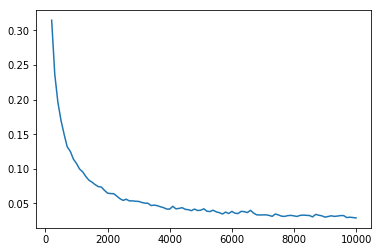

In [11]:
RunConvolutionalNN(dropout_keep_prob=0.5)